In [33]:
# 🔹 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [34]:
# 🔹 2. Load Already Cleaned and Feature-Engineered Data
df1 = pd.read_csv('C:/Users/PRITI/Desktop/revenue-insights-hotel/outputs/model_ready.csv')
df1.head()


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_id,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_class,property_name,category,city,mmm yy,week no,day_type,stay_length,lead_time,is_weekend,is_cancelled,net_revenue
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Standard,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend,1,4,0,0,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Standard,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend,1,1,0,1,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Standard,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend,3,3,0,0,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Standard,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend,1,3,0,1,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920,Standard,Atliq Grands,Luxury,Delhi,May-22,W 19,weekend,1,4,0,0,10920


In [35]:
# 🔹 3. Overview of Data
print("Shape:", df1.shape)
df1.info()
df1.describe()
df1.isnull().sum()


Shape: (134590, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_id            134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  room_class         134590 non-null  object 
 13  property_name      134590 non-null  object 
 14  category           134590 non-null  object 
 15  city               134590 non-n

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_id                  0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
room_class               0
property_name            0
category                 0
city                     0
mmm yy                   0
week no                  0
day_type                 0
stay_length              0
lead_time                0
is_weekend               0
is_cancelled             0
net_revenue              0
dtype: int64

C:\Users\PRITI\AppData\Local\Temp\ipykernel_2556\1937846855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='booking_status', palette='pastel')


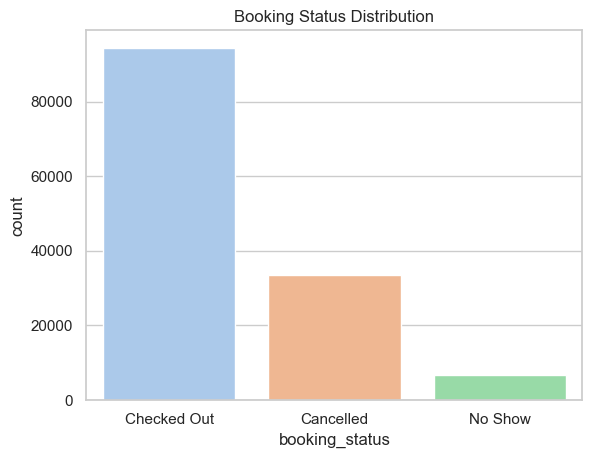

Cancellation Rate: 24.83%


In [36]:
# 🔹 4. Booking Status Distribution
sns.countplot(data=df1, x='booking_status', palette='pastel')
plt.title("Booking Status Distribution")
plt.show()

cancel_rate = df1['is_cancelled'].mean() * 100
print(f"Cancellation Rate: {cancel_rate:.2f}%")


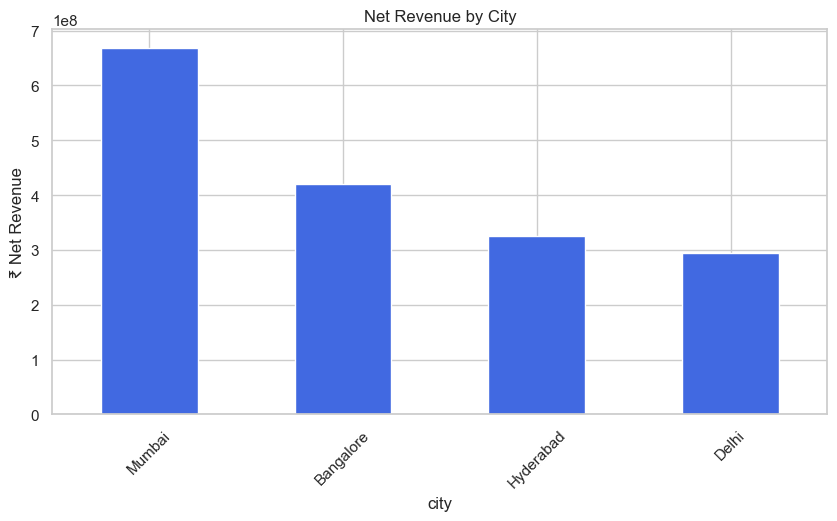

In [38]:
# 🔹 5. Revenue by City
city_rev = df1.groupby('city')['net_revenue'].sum().sort_values(ascending=False)
city_rev.plot(kind='bar', figsize=(10,5), color='royalblue', title='Net Revenue by City')
plt.ylabel("₹ Net Revenue")
plt.xticks(rotation=45)
plt.show()


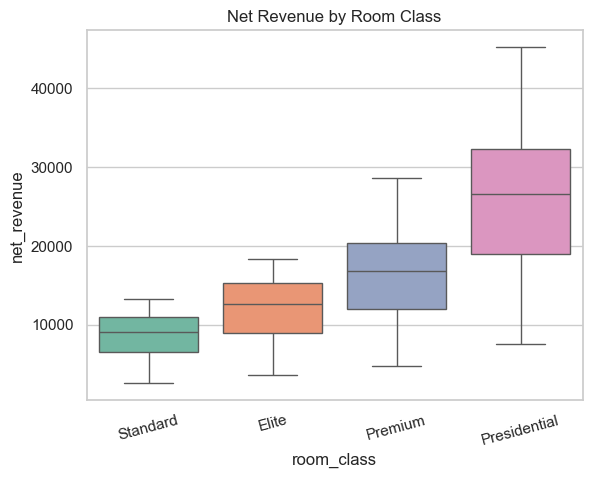

In [41]:
# 🔹 6. Revenue by Room Class
sns.boxplot(data=df1, x='room_class', y='net_revenue', hue='room_class', palette='Set2', legend=False)
plt.title("Net Revenue by Room Class")
plt.xticks(rotation=15)
plt.show()


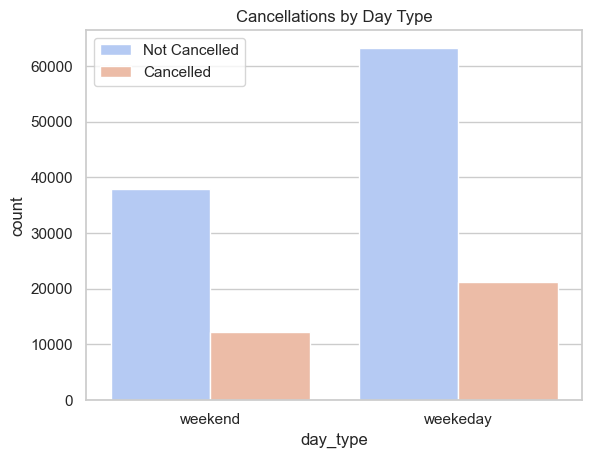

In [47]:
# 🔹 8. Cancellation by Day Type
sns.countplot(data=df1, x='day_type', hue='is_cancelled', palette='coolwarm')
plt.title("Cancellations by Day Type")
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()


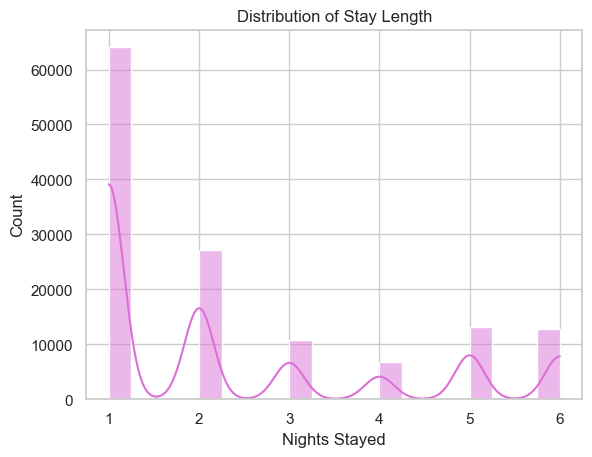

In [48]:
# 🔹 9. Stay Length Distribution
sns.histplot(df1['stay_length'], kde=True, bins=20, color='orchid')
plt.title("Distribution of Stay Length")
plt.xlabel("Nights Stayed")
plt.show()


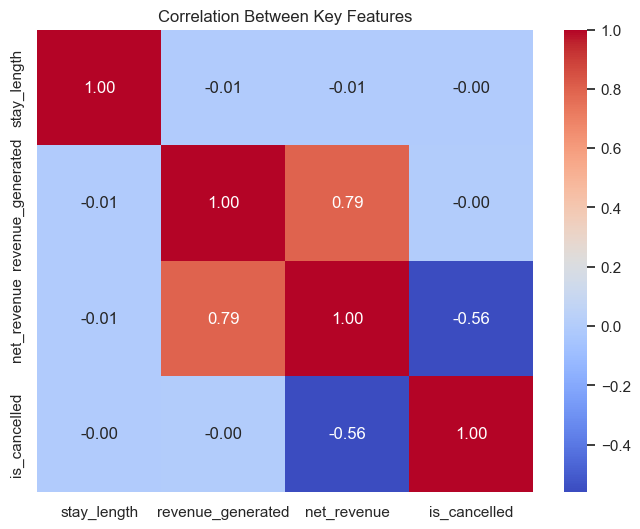

In [52]:
# 🔹 10. Correlation Heatmap (Updated)
corr = df1[['stay_length', 'revenue_generated', 'net_revenue', 'is_cancelled']].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Key Features")
plt.show()

